In [ ]:
import os
import numpy as np

from matplotlib import pyplot

from scipy import optimize

%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('/content/dataset_10.csv')

# Dividir los datos en conjuntos de entrenamiento y prueba
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print("Conjunto de entrenamiento:")
print(df_train)
print("\nConjunto de prueba:")
print(df_test)


Conjunto de entrenamiento:
        0    1    2    3    4    5    6    7    8    9  ...   3062   3063  \
4335   52  183  171   52  183  171   52  183  171   52  ...  255.0  255.0   
353   255  255  255  255  255  255  255  255  255  255  ...  255.0  255.0   
456   105   97    5  105   97    5  105   97    5  105  ...  255.0  255.0   
5317  255  255  255  255  255  255  255  255  255  255  ...  255.0  255.0   
239   183  158   87  183  158   87  255  255  255  255  ...  255.0  255.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
5734  255  255  255  255  255  255  255  255  255  255  ...  255.0  255.0   
5191  255  255  255  255  255  255  255  255  255  255  ...  255.0  255.0   
5390   66  159   44   66  159   44   66  159   44   66  ...  255.0  255.0   
860   255  255  255  255  255  255  255  255  255  255  ...  255.0  255.0   
7270  255  255  255  255  255  255  255  255  255  255  ...  255.0  255.0   

       3064   3065   3066   3067   3068   3069  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


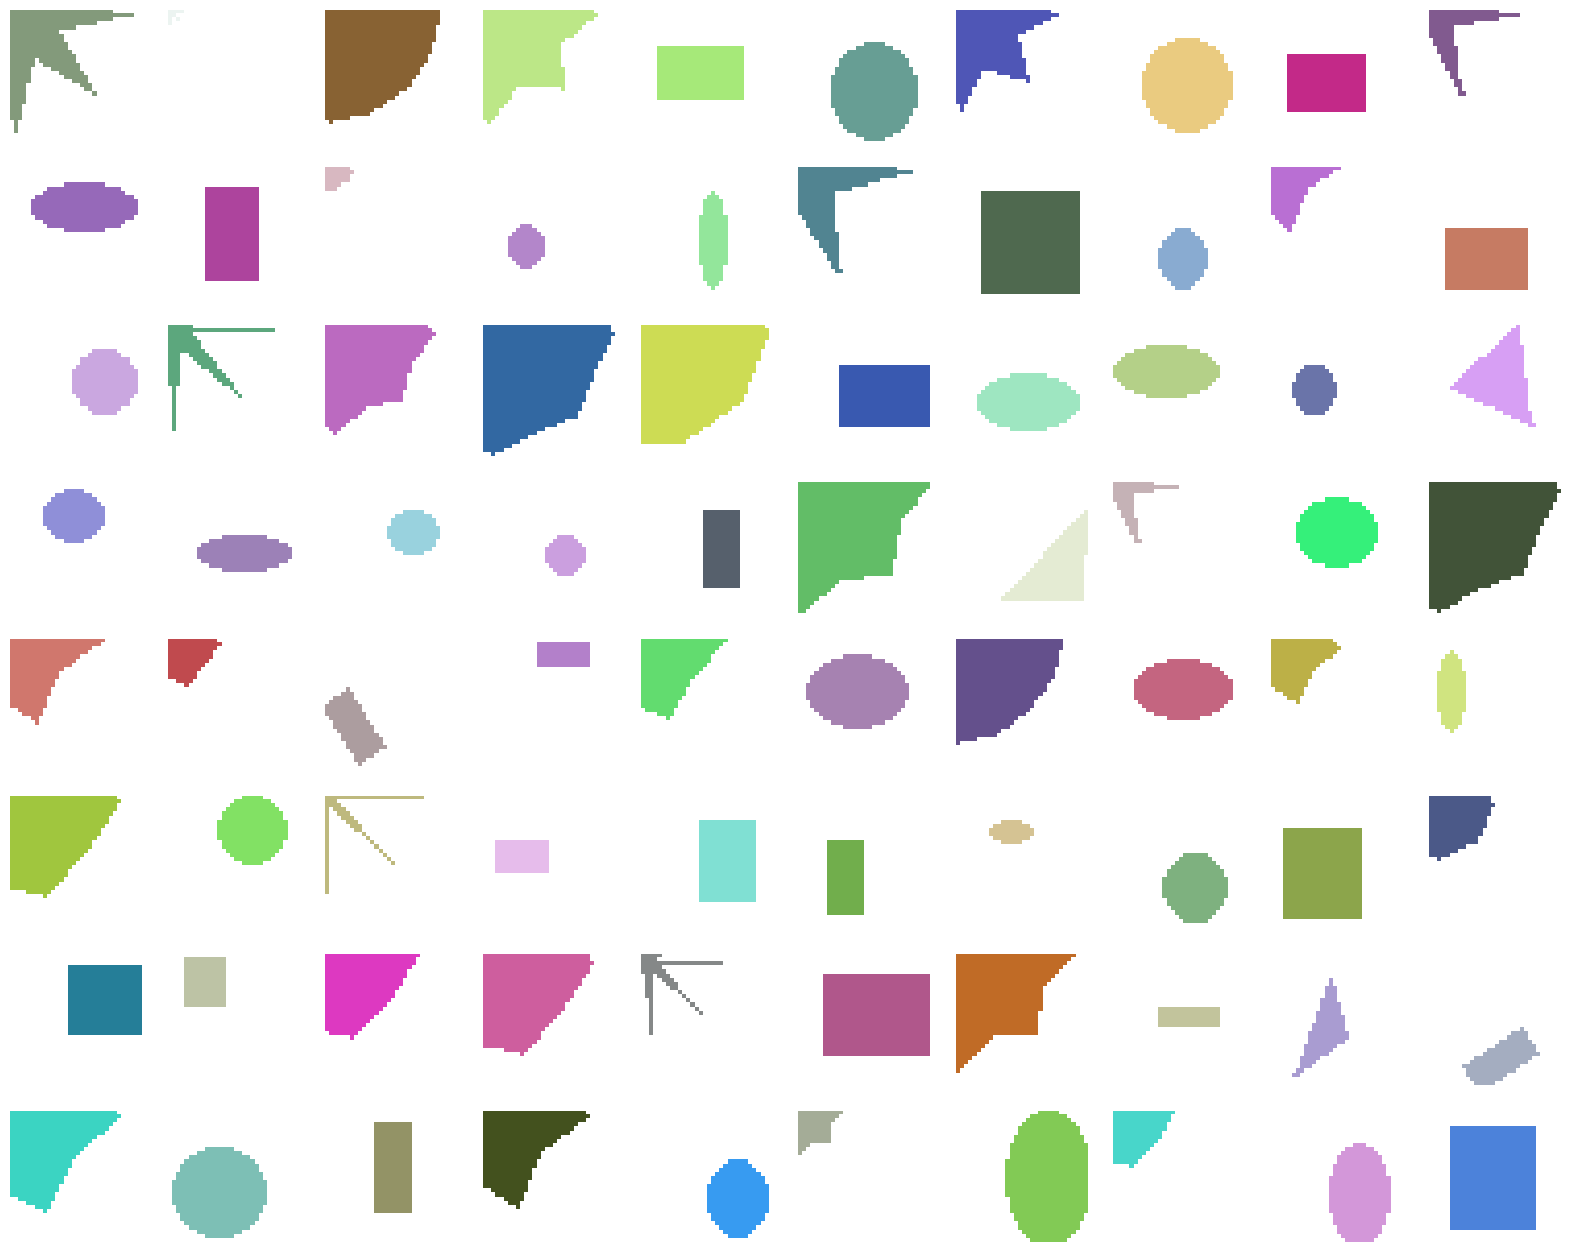

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Cargar el archivo CSV
df = pd.read_csv('/content/dataset_10.csv')

# Dividir los datos en conjuntos de entrenamiento y prueba
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Supongamos que todas las columnas son características y que no hay columna target
X_train = df_train
X_test = df_test

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train_clean = imputer.fit_transform(X_train)

# Configurar el número de clusters para KMeans
k = 80  # Número de clústeres

# Crear el modelo KMeans con el número de clusters y una semilla para la aleatoriedad
kmeans = KMeans(n_clusters=k, random_state=42)

#y me diga q tal lejos esta estas X_Train de los centroides
X_digits_dist = kmeans.fit_transform(X_train_clean)

#aplico np.argmin que debuelve un indice con los datos mas cercanos
#al centroide
idxs = np.argmin(X_digits_dist, axis=0)

#contiene los datosmas  representaticvas que estan mas sercanas al claster
X_representative_digits = X_train_clean[idxs]

# Graficar las muestras más representativas
plt.figure(figsize=(20, 16))

# Iterar sobre las imágenes más representativas
for index, X_representative_digit in enumerate(X_representative_digits):
    # Crear una gráfica de 8 filas y 10 columnas
    plt.subplot(8, 10, index+1)
    plt.imshow(X_representative_digit.reshape(32, 32, 3).astype(np.uint8))
    plt.axis('off')

plt.show()


In [ ]:
labels = kmeans.labels_
y_representative_digits = labels[idxs]
print(y_representative_digits)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 32 21 22 23
 24 25 26 27 28 29 56 31 32 33 34 35  1 12 38 39 40 41 13 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 33 79]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Crear y ajustar el modelo de regresión logística
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Ajustar el modelo con los datos de entrenamiento representativos
%time log_reg2.fit(X_representative_digits, y_representative_digits)

# Medir la precisión del modelo en el conjunto de prueba
accuracy = log_reg2.score(X_test, kmeans.predict(X_test))
print(f'Precisión del modelo en el conjunto de prueba: {accuracy:.2f}')

CPU times: user 8.04 s, sys: 5.81 s, total: 13.9 s
Wall time: 12.5 s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Precisión del modelo en el conjunto de prueba: 0.54
